<a href="https://colab.research.google.com/github/WafaJohal/ColabRepo/blob/master/ThymioAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from datetime import datetime, date, time, timedelta
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
import seaborn as sns

In [0]:
## function that computes the effect size
def effect_size(m1,sd1,n1,m2,sd2,n2):
    mdiff = m1-m2
    sp = math.sqrt((((n1-1)*(math.pow(sd1,2)))+((n2-1)*(math.pow(sd2,2))))/(n1+n2-2))
    d = mdiff/sp
    data = [m1,sd1,n1,m2,sd2,n2,mdiff,sp]    
    print("d = ", d)
    #print data
    return data

In [0]:
csvfilename = 'test_simplified.csv'
csvfilename = 'test_simplified_arranged.csv'
df = pd.read_csv(csvfilename)
print(df.dtypes)
df.head()

Unnamed: 0      int64
AGE           float64
AR             object
Classroom      object
ID.            object
Date           object
Name           object
Gender         object
Average       float64
PAM           float64
Teacher        object
Work Group      int64
value         float64
test           object
concept        object
dtype: object


,Unnamed: 0,AGE,AR,Classroom,ID.,Date,Name,Gender,Average,PAM,Teacher,Work Group,value,test,concept
0,1,NaN,NOAR,Olders,C01,01.mai.17,Romain A,Male,4.6,1,FM,1,1,Pretest,C1
1,2,NaN,NOAR,Olders,C02,01.mai.17,Marine F,Female,4.8,0,FM,1,0,Pretest,C1
2,3,NaN,NOAR,Olders,C03,01.mai.17,Alexandre H,Male,4.5,0,FM,2,0,Pretest,C1
3,4,NaN,NOAR,Olders,C04,01.mai.17,Daniel K,Male,4.7,0,FM,2,0,Pretest,C1
4,5,NaN,NOAR,Olders,C05,01.mai.17,Maria G,Female,4.5,1,FM,3,0,Pretest,C1


### ask francesco age of older kids (which class)

In [0]:
print('Demographics')
m = df[df['Classroom'] == 'Youngs'].AGE.mean()
std = df[df['Classroom'] == 'Youngs'].AGE.std()
print('Youngs M=%1.2f, STD=%1.2f' % (m, std))
m = df[df['Classroom'] == 'Olders'].AGE.mean()
std = df[df['Classroom'] == ' Olders'].AGE.std()
print('Olders M=%1.2f, STD=%1.2f' % (m, std))
print('------------')
m = df[df['Gender'] == 'Male'].AGE.mean()
std = df[df['Gender'] == 'Male'].AGE.std()
print('Male M=%1.2f, STD=%1.2f' % (m, std))
m = df[df['Gender'] == 'Female'].AGE.mean()
std = df[df['Gender'] == 'Female'].AGE.std()
print('Female M=%1.2f, STD=%1.2f' % (m, std))


Demographics
Youngs M=10.09, STD=0.78
Olders M=nan, STD=nan
------------
Male M=10.17, STD=0.80
Female M=10.00, STD=0.74


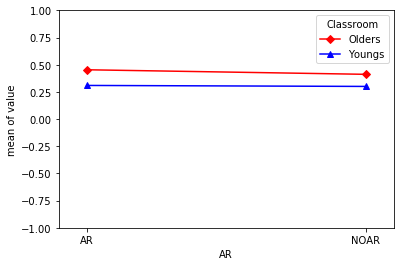

In [0]:
#df.boxplot(column="value",by=['AR','Classroom'])
#plt.show()

import statsmodels.graphics.factorplots as stsp
fig = stsp.interaction_plot(df.AR, df.Classroom,df.value,
            colors=['red','blue'], markers=['D','^'])
import matplotlib.pyplot as plt
plt.ylim(df.value.min(),df.value.max())
plt.show()


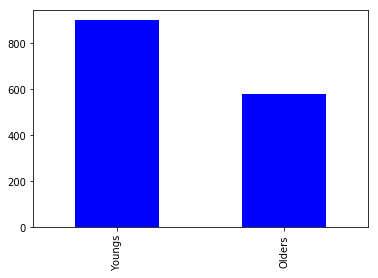

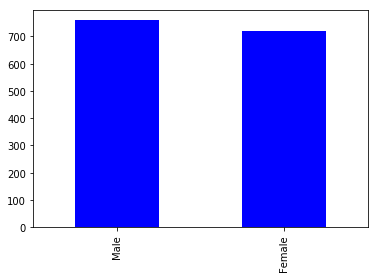

In [0]:
df['Classroom'].value_counts().plot( kind='bar')
plt.show()
df['Gender'].value_counts().plot( kind='bar')
plt.show()

# H1   Augmented Reality >  Non-AR condition. 

============== PRETEST ==============
0.41244952129273577
0.37193033149814964
t = 1.110904901580505
p = 0.26753932500745187
============== MIDTEST ==============
0.3391818690688888
0.3214631386857085
t = -0.5710661902079421
p = 0.5683960940298245
============== POSTTEST ==============
0.6886574074069445
0.5882675438605262
t = 2.276287478639509
p = 0.023547732620139657


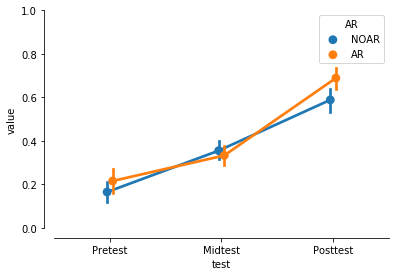

In [0]:
print("============== PRETEST ==============")
dfpre = df[df['test']=='Pretest']
dfAR = dfpre[dfpre['AR'] == "AR"]
dfNAR = dfpre[dfpre['AR'] == "NOAR"]

print(dfAR.value.std())
print(dfNAR.value.std())
# Calculates the T-test for the means of TWO INDEPENDENT samples of scores.
t2, p2 = stats.ttest_ind(dfAR.value,dfNAR.value, equal_var= False)
print("t = " + str(t2))
print("p = " + str(p2))

print("============== MIDTEST ==============")
dfmid = df[df['test']=='Midtest']
dfAR = dfmid[dfmid['AR'] == "AR"]
dfNAR = dfmid[dfmid['AR'] == "NOAR"]

print(dfAR.value.std())
print(dfNAR.value.std())
# Calculates the T-test for the means of TWO INDEPENDENT samples of scores.
t2, p2 = stats.ttest_ind(dfAR.value,dfNAR.value, equal_var= False)
print("t = " + str(t2))
print("p = " + str(p2))



print("============== POSTTEST ==============")
dfpost = df[df['test']=='Posttest']
dfAR = dfpost[dfpost['AR'] == "AR"]
dfNAR = dfpost[dfpost['AR'] == "NOAR"]

print(dfAR.value.mean())
print(dfNAR.value.mean())
# Calculates the T-test for the means of TWO INDEPENDENT samples of scores.
t2, p2 = stats.ttest_ind(dfAR.value,dfNAR.value, equal_var= False)
print("t = " + str(t2))
print("p = " + str(p2))

dftest = dfpre.append(dfmid.append(dfpost))

g = sns.pointplot(x="test", y="value", hue="AR",data=dftest,  ci=90, dodge=True)
sns.despine(offset=10, trim=False)
g.set(ylim=(0, 1))
plt.savefig("../paper/figures/test_AR.svg")
plt.show()

[(0, 1)]

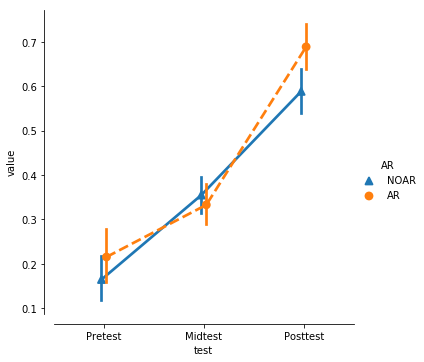

In [0]:
sns.catplot(kind="point", x="test", y="value", hue="AR",data=dftest,  ci=90, dodge=True, markers=["^", "o"], linestyles=["-", "--"])
sns.despine(offset=10, trim=False)
g.set(ylim=(0, 1))

# H2: Interaction Concept and AR

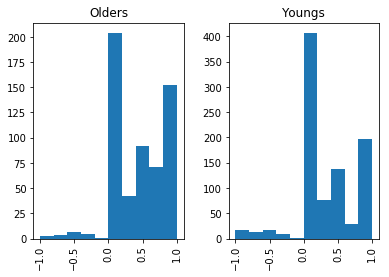

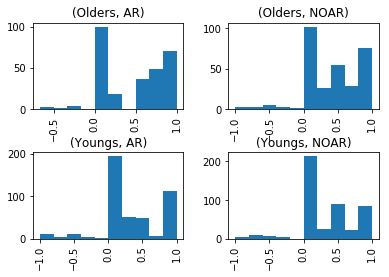

In [0]:
csvfilename = 'test_simplified_arranged.csv'
df = pd.read_csv(csvfilename)
df.value.hist(by=df.Classroom)
plt.show()
df.value.hist(by=[df.Classroom,df.AR])
plt.show()

============== C1 ==============
0.5908730612830213
0.44777366283964487
t = -0.005342982182327007
p = 0.9957401336105829
============== C2 ==============
0.46343654652015487
0.48720755925196674
t = 0.047331023385400614
p = 0.9622750784314522
============== C3 ==============
0.40664441466536927
0.3475747305593356
t = 3.473233262752101
p = 0.0005782257071043868
============== C4 ==============
0.38102924888027295
0.442434888809106
t = -1.2632876398237043
p = 0.20729274931342484


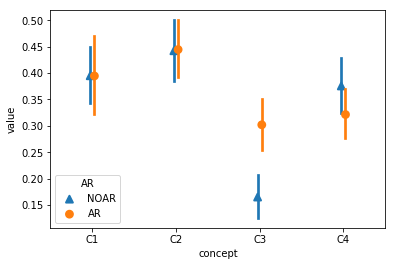

In [0]:
print("============== C1 ==============")
dfC1 = df[df['concept']=='C1']
dfAR = dfC1[dfC1['AR'] == "AR"]
dfNAR = dfC1[dfC1['AR'] == "NOAR"]

print(dfAR.value.std())
print(dfNAR.value.std())
# Calculates the T-test for the means of TWO INDEPENDENT samples of scores.
t2, p2 = stats.ttest_ind(dfAR.value,dfNAR.value, equal_var= False)
print("t = " + str(t2))
print("p = " + str(p2))

print("============== C2 ==============")
dfC2 = df[df['concept']=='C2']
dfAR = dfC2[dfC2['AR'] == "AR"]
dfNAR = dfC2[dfC2['AR'] == "NOAR"]

print(dfAR.value.std())
print(dfNAR.value.std())
# Calculates the T-test for the means of TWO INDEPENDENT samples of scores.
t2, p2 = stats.ttest_ind(dfAR.value,dfNAR.value, equal_var= False)
print("t = " + str(t2))
print("p = " + str(p2))

print("============== C3 ==============")
dfC3 = df[df['concept']=='C3']
dfAR = dfC3[dfC3['AR'] == "AR"]
dfNAR = dfC3[dfC3['AR'] == "NOAR"]

print(dfAR.value.std())
print(dfNAR.value.std())
# Calculates the T-test for the means of TWO INDEPENDENT samples of scores.
t2, p2 = stats.ttest_ind(dfAR.value,dfNAR.value, equal_var= False)
print("t = " + str(t2))
print("p = " + str(p2))

print("============== C4 ==============")
dfC4 = df[df['concept']=='C4']
dfAR = dfC4[dfC4['AR'] == "AR"]
dfNAR = dfC4[dfC4['AR'] == "NOAR"]

print(dfAR.value.std())
print(dfNAR.value.std())
# Calculates the T-test for the means of TWO INDEPENDENT samples of scores.
t2, p2 = stats.ttest_ind(dfAR.value,dfNAR.value, equal_var= False)
print("t = " + str(t2))
print("p = " + str(p2))


dftest = dfC1.append(dfC2.append(dfC3.append(dfC4)))

sns.pointplot(x="concept", y="value", hue="AR",data=dftest,  ci=90, dodge=True, join=False,  markers=["^", "o"])
plt.savefig("../paper/figures/concept_AR.svg")
plt.show()

# H3 Interaction effect Age X AR

============== Youngs ==============
0.4871468404199836
0.4419522874501942
t = 0.29333525566978164
p = 0.769335036223643
============== Olders ==============
0.4281594708923276
0.44528059120626745
t = 1.1553036080313588
p = 0.2484439110456369


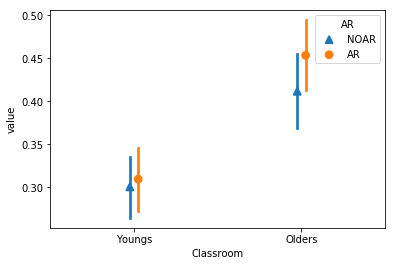

In [0]:
print("============== Youngs ==============")
dfy = df[df['Classroom']=='Youngs']
dfAR = dfy[dfy['AR'] == "AR"]
dfNAR = dfy[dfy['AR'] == "NOAR"]

print(dfAR.value.std())
print(dfNAR.value.std())
# Calculates the T-test for the means of TWO INDEPENDENT samples of scores.
t2, p2 = stats.ttest_ind(dfAR.value,dfNAR.value, equal_var= False)
print("t = " + str(t2))
print("p = " + str(p2))

print("============== Olders ==============")
dfO = df[df['Classroom']=='Olders']
dfAR = dfO[dfO['AR'] == "AR"]
dfNAR = dfO[dfO['AR'] == "NOAR"]

print(dfAR.value.std())
print(dfNAR.value.std())
# Calculates the T-test for the means of TWO INDEPENDENT samples of scores.
t2, p2 = stats.ttest_ind(dfAR.value,dfNAR.value, equal_var= False)
print("t = " + str(t2))
print("p = " + str(p2))

dftest = dfy.append(dfO)

sns.pointplot(x="Classroom", y="value", hue="AR",data=dftest,  ci=90, dodge=True, join=False,  markers=["^", "o"])
plt.savefig("../paper/figures/age_AR.svg")
plt.show()

# H4 interaction Gender X AR

============== Girls ==============
0.462604716117167
0.4548012200207348
t = -0.5414492446042749
p = 0.58836870299513
============== Boys ==============
0.4735071508381184
0.4381654480522937
t = 1.6963557530798172
p = 0.09023157169359489


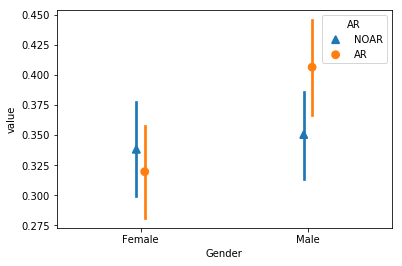

In [0]:
print("============== Girls ==============")
dfy = df[df['Gender']=='Female']
dfAR = dfy[dfy['AR'] == "AR"]
dfNAR = dfy[dfy['AR'] == "NOAR"]

print(dfAR.value.std())
print(dfNAR.value.std())
# Calculates the T-test for the means of TWO INDEPENDENT samples of scores.
t2, p2 = stats.ttest_ind(dfAR.value,dfNAR.value, equal_var= False)
print("t = " + str(t2))
print("p = " + str(p2))

print("============== Boys ==============")
dfO = df[df['Gender']=='Male']
dfAR = dfO[dfO['AR'] == "AR"]
dfNAR = dfO[dfO['AR'] == "NOAR"]

print(dfAR.value.std())
print(dfNAR.value.std())
# Calculates the T-test for the means of TWO INDEPENDENT samples of scores.
t2, p2 = stats.ttest_ind(dfAR.value,dfNAR.value, equal_var= False)
print("t = " + str(t2))
print("p = " + str(p2))

dftest = dfy.append(dfO)

sns.pointplot(x="Gender", y="value", hue="AR",data=dftest,  ci=90, dodge=True, join=False,  markers=["^", "o"])
plt.savefig("../paper/figures/gender_AR.svg")
plt.show()

In [0]:
print(df.groupby("Classroom").describe(include = "value")["value"]

dfyoung = df.loc[(df.Classroom == "Youngs")]
dfold = df.loc[(df.Classroom == "Olders")]



# Calculates the T-test for the means of TWO INDEPENDENT samples of scores.
t2, p2 = stats.ttest_ind(dfyoung.value,dfold.value)
print("t = " + str(t2))
print("p = " + str(2*p2))

effect_size(dfyoung.value.mean(),dfyoung.value.std(),len(dfyoung.value),
            dfold.value.mean(),dfold.value.std(),len(dfold.value))

print()

                   Unnamed: 0         AGE    AR  ID.        Date  \
Classroom                                                          
Olders    25%      359.500000         NaN   NaN  NaN         NaN   
          50%      718.000000         NaN   NaN  NaN         NaN   
          75%     1076.500000         NaN   NaN  NaN         NaN   
          count    580.000000    0.000000   580  580         580   
          freq            NaN         NaN   300   20         300   
          max     1435.000000         NaN   NaN  NaN         NaN   
          mean     718.000000         NaN   NaN  NaN         NaN   
          min        1.000000         NaN   NaN  NaN         NaN   
          std      427.155228         NaN   NaN  NaN         NaN   
          top             NaN         NaN  NOAR  C05   01.mai.17   
          unique          NaN         NaN     2   29           2   
Youngs    25%      392.500000    9.000000   NaN  NaN         NaN   
          50%      755.000000   10.000000   NaN 

TypeError: 'NoneType' object is not subscriptable